In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph

In [2]:
class AgentState(TypedDict):
    name: str
    age: int
    final: str

In [3]:
def first_node(state: AgentState) -> AgentState:
    state["final"] = f"Hi there {state['name']}, "
    return state

def second_node(state: AgentState) -> AgentState:
    state["final"] += f"you are {state['age']} yesars old!"
    return state

In [5]:
# init graph
graph = StateGraph(AgentState)

# add nodes
graph.add_node("first_node", first_node)
graph.add_node("second_node", second_node)

# set entry point
graph.set_entry_point("first_node")

# !! AD EDGE BETWEEN NODES
graph.add_edge("first_node", "second_node")

# set final point
graph.set_finish_point("second_node")


# complie graph
app = graph.compile()

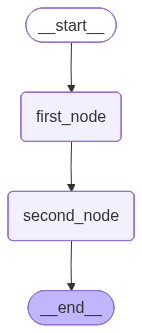

In [6]:
# Visulaize the graph
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [7]:
result = app.invoke({
    "name": "pedri",
    "age": 24
})

result["final"]

'Hi there pedri, you are 24 yesars old!'